## **Ex.1 - Loading the dataset**

> Indented block



In [ ]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<hr>

Splitting the data into 70% training and 30% test subsets.

In [ ]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,
                     stratify=y,
                     random_state=0)

Standardizing the data.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## **Ex.2 - Principal component analysis in scikit-learn**

### Part 1 - *Perform PCA and present the explained variance ratio* (check https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Perform the transformation on test data and plot the first two principal components.

Razão de Variância Explicada:
 [0.36951469 0.18434927 0.11815159 0.07334252 0.06422108 0.05051724
 0.03954654 0.02643918 0.02389319 0.01629614 0.01380021 0.01172226
 0.00820609]


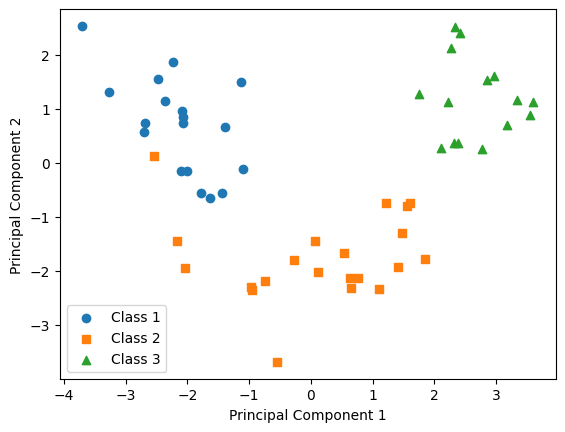

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
explained_variance = pca.explained_variance_ratio_
print("Razão de Variância Explicada:\n", explained_variance)
X_test_pca = pca.transform(X_test_std)
plt.scatter(X_test_pca[y_test == 1, 0], X_test_pca[y_test == 1, 1], label='Class 1', marker='o')
plt.scatter(X_test_pca[y_test == 2, 0], X_test_pca[y_test == 2, 1], label='Class 2', marker='s')
plt.scatter(X_test_pca[y_test == 3, 0], X_test_pca[y_test == 3, 1], label='Class 3', marker='^')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


### Part 2 - *Training logistic regression classifier using the first 2 principal components*. Using a cross-validation procedure (check https://scikit-learn.org/stable/modules/cross_validation.html), select the best C parameter for the logistic regression with the first two principal components. Repeat the same procedure for the dataset with all the original features. Compare the results in terms of accuracy and confusion matrix. Present the conclusions.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crie um DataFrame para armazenar os resultados
results_df = pd.DataFrame(columns=['C', 'C2', 'Accuracy PCA', 'Accuracy All Features'])

# Valores de C a serem avaliados
c_values = [0.001, 0.01, 0.1, 1, 10, 100]

for c in c_values:
  for c2 in c_values:
      # Treine um classificador de regressão logística usando os dois primeiros componentes principais
      lr = LogisticRegression(C=c, solver='liblinear', multi_class='auto')
      lr.fit(X_train_pca[:, :2], y_train)

      # Calcula a acurácia usando validação cruzada para os dois primeiros componentes principais
      scores_pca = cross_val_score(estimator=lr, X=X_train_pca[:, :2], y=y_train, cv=10, scoring='accuracy')
      mean_accuracy_pca = np.mean(scores_pca)

      # Treine um classificador de regressão logística com todas as características originais
      lr_all_features = LogisticRegression(C=c2, solver='liblinear', multi_class='auto')
      lr_all_features.fit(X_train_std, y_train)

      # Calcula a acurácia usando validação cruzada com todas as características originais
      scores_all_features = cross_val_score(estimator=lr_all_features, X=X_train_std, y=y_train, cv=10, scoring='accuracy')
      mean_accuracy_all_features = np.mean(scores_all_features)

      # Armazena os resultados no DataFrame
      results_df = results_df.append({'C': c, 'C2': c2, 'Accuracy PCA': mean_accuracy_pca, 'Accuracy All Features': mean_accuracy_all_features}, ignore_index=True)

print(results_df)

<ipython-input-42-936f6e231a65>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'C': c, 'C2': c2, 'Accuracy PCA': mean_accuracy_pca, 'Accuracy All Features': mean_accuracy_all_features}, ignore_index=True)
<ipython-input-42-936f6e231a65>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'C': c, 'C2': c2, 'Accuracy PCA': mean_accuracy_pca, 'Accuracy All Features': mean_accuracy_all_features}, ignore_index=True)
<ipython-input-42-936f6e231a65>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'C': c, 'C2': c2, 'Accuracy PCA': mean_accuracy_pca, 'Accuracy All Features': mean_accuracy_all_features}, ignore_index=True)
<ipython-inpu

          C       C2  Accuracy PCA  Accuracy All Features
0     0.001    0.001      0.927564               0.935256
1     0.001    0.010      0.927564               0.959615
2     0.001    0.100      0.927564               0.959615
3     0.001    1.000      0.927564               0.975641
4     0.001   10.000      0.927564               0.967949
5     0.001  100.000      0.927564               0.967949
6     0.010    0.001      0.942949               0.935256
7     0.010    0.010      0.942949               0.959615
8     0.010    0.100      0.942949               0.959615
9     0.010    1.000      0.942949               0.975641
10    0.010   10.000      0.942949               0.967949
11    0.010  100.000      0.942949               0.967949
12    0.100    0.001      0.958974               0.935256
13    0.100    0.010      0.958974               0.959615
14    0.100    0.100      0.958974               0.959615
15    0.100    1.000      0.958974               0.975641
16    0.100   

<ipython-input-42-936f6e231a65>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'C': c, 'C2': c2, 'Accuracy PCA': mean_accuracy_pca, 'Accuracy All Features': mean_accuracy_all_features}, ignore_index=True)
<ipython-input-42-936f6e231a65>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'C': c, 'C2': c2, 'Accuracy PCA': mean_accuracy_pca, 'Accuracy All Features': mean_accuracy_all_features}, ignore_index=True)


In [ ]:
#OBS: Teve varias combinações chegando a 0.975641 de acc

Acurácia nos dois primeiros componentes principais: 0.9259259259259259
Matriz de Confusão nos dois primeiros componentes principais:


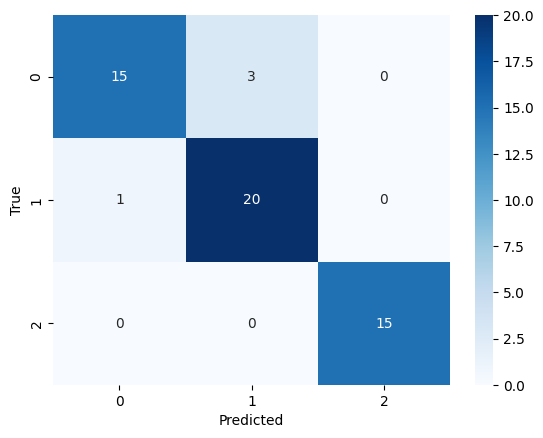

Acurácia com todas as características originais: 1.0
Matriz de Confusão com todas as características originais:


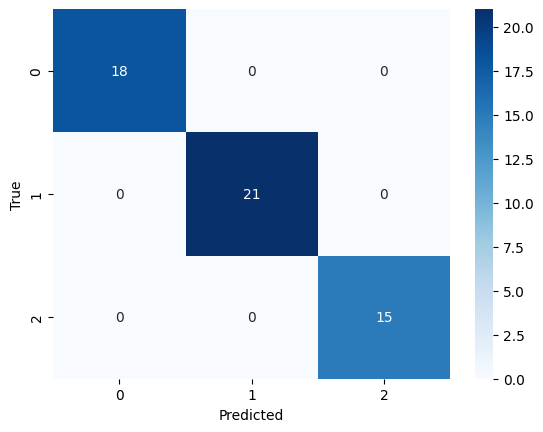

In [ ]:
# Treinar um classificador de regressão logística usando os dois primeiros componentes principais
lr_pca = LogisticRegression(C=100.0, solver='liblinear', multi_class='auto')
lr_pca.fit(X_train_pca[:, :2], y_train)

# Treinar um classificador de regressão logística com todas as características originais
lr_all_features = LogisticRegression(C=10.0, solver='liblinear', multi_class='auto')
lr_all_features.fit(X_train_std, y_train)

# Avaliar o desempenho nos dados de teste com os dois primeiros componentes principais
y_pred_pca = lr_pca.predict(X_test_pca[:, :2])
accuracy_pca = accuracy_score(y_test, y_pred_pca)
confusion_matrix_pca = confusion_matrix(y_test, y_pred_pca)

print("Acurácia nos dois primeiros componentes principais:", accuracy_pca)
print("Matriz de Confusão nos dois primeiros componentes principais:")
sns.heatmap(confusion_matrix_pca, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Avaliar o desempenho nos dados de teste com todas as características originais
y_pred_all_features = lr_all_features.predict(X_test_std)
accuracy_all_features = accuracy_score(y_test, y_pred_all_features)
confusion_matrix_all_features = confusion_matrix(y_test, y_pred_all_features)

print("Acurácia com todas as características originais:", accuracy_all_features)
print("Matriz de Confusão com todas as características originais:")
sns.heatmap(confusion_matrix_all_features, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
